## Monitoria: Programação Estruturada
**29-06-2024**

# Visualizando Dados

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medical_dt = pd.read_csv("insurance.csv", sep = ';')

medical_dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [93]:
for _, entry in medical_dt.iterrows():
    print(entry.get("casa"))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [52]:
# Quantas pessoas tem para cada genero
medical_dt["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [74]:
# Quantidade de linhas
medical_dt.shape[0]

1338

In [53]:
# Qual a região mais frequente
medical_dt.groupby(by = "region").size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [63]:
print(f"Total de Fumantes: {sum(medical_dt['smoker'].apply(lambda tipo: tipo == 'yes'))}")
print(f"Total de Não Fumantes: {sum(medical_dt['smoker'].apply(lambda tipo: tipo == 'no'))}")

Total de Fumantes: 274
Total de Não Fumantes: 1064


In [69]:
fumantes = medical_dt.groupby(by = "smoker", as_index= False).size()
total_pessoas = medical_dt.shape[0]
fumantes["%"] = fumantes["size"].apply(lambda valor: valor / total_pessoas * 100)

fumantes

,smoker,size,%
0,no,1064,79.521674
1,yes,274,20.478326


In [3]:
medical_dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
medical_dt.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

### Visualização com Boxplot

Uma forma de visualizar parte dessas medidas gráficamente é com Boxplots, que representam a distribuição dos dados baseado em quartis.

1. **Mínimo:** É o menor valor observado no conjunto de dados, excluindo quaisquer valores considerados outliers.

2. **Primeiro quartil (Q1):** Também conhecido como quartil inferior, é o valor que divide o conjunto de dados em 25% dos valores menores e 75% dos valores maiores. Ou seja, 25% dos valores estão abaixo do Q1.

3. **Mediana:** É o valor que divide o conjunto de dados ao meio, ou seja, 50% dos valores estão abaixo da mediana e 50% estão acima dela. A mediana é representada por uma linha dentro da caixa.

4. **Terceiro quartil (Q3):** Também conhecido como quartil superior, é o valor que divide o conjunto de dados em 75% dos valores menores e 25% dos valores maiores. Ou seja, 75% dos valores estão abaixo do Q3.

5. **Máximo:** É o maior valor observado no conjunto de dados, excluindo quaisquer valores considerados outliers.

Outliers são valores que estão muito distantes dos demais valores e podem indicar pontos fora do padrão esperado. No boxplot, eles são representados como pontos ou asteriscos individuais.

<img src="boxplot.png" alt="drawing" width="60%"/>

Para plotar um Boxplot com a biblioteca Seaborn, podemos utilizar a seguinte função

```python
sns.boxplot(dt, x = 'coluna')
```

Existem inúmeros parâmetros para alteração de cor e orientação da figura. Se usassemos `y = 'coluna'`, a figura seria plotada paralelamente ao eixo Y. A documentação do seaborn apresenta todos os possíveis parâmetros para essa e outras visualizações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Se visualizarmos o boxplot da coluna *bmi*, que se refere ao IMC (Indice de Massa Corporal) dos indivíduos da base, pode-se notar que, segundo o índice, os dados estão bem distribuídos entre pessoas com peso ideal e acima do peso (< 30) e pessoas com algum grau de obsidade (> 30). Mas, ainda assim, existem alguns outliers, que representam valores de IMC muito distantes da faixa de distribuição. Nessa situação, não podemos considerá-los dados falsos, pois existem pessoas com esses graus altos de IMC no mundo real, mas podem haver situações em que os dados são claramente mentirosos, como idades maiores que 150 anos.

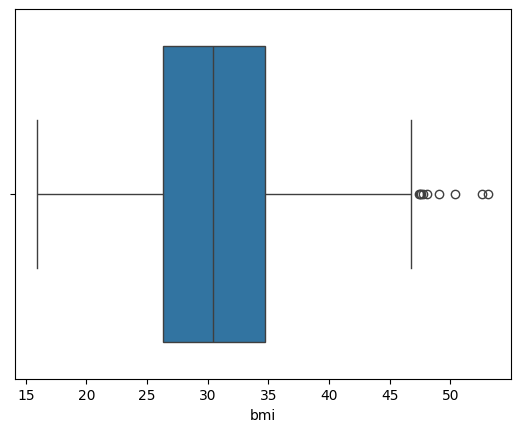

In [76]:
sns.boxplot(medical_dt, x = 'bmi')
plt.show()

### Visualização com Histogramas

Uma outra maneira de visualizar a distribuição dos dados da base é através de histogramas, que representam a distribuição, baseada na contagem de ocorrências de dados em intervalos. Os **intervalos** ou **bins** dividem a faixa de valores em intervalos discretos, sendo representados por barras. Tanto histogramas, quanto boxplots auxiliam na identificação de padrões, tendências e anomalias presentes nos dados.

---

Através de histogramas, podemos indentficar diferentes tipos de distribuição conhecidos na ciência de dados e estatística

<img src="distribuicao.png" alt="drawing" width="60%"/>

1. **Distribuição normal (ou distribuição de Gauss):** A distribuição normal é simétrica e possui uma forma de sino. Nessa distribuição, a média, mediana e moda são todas iguais e estão localizadas no centro da distribuição. Os dados tendem a se concentrar em torno da média e apresentam uma proporção igual de valores acima e abaixo da média. Além disso, muitas técnicas estatísticas assumem que os dados seguem uma distribuição normal.

2. **Distribuição uniforme:** Na distribuição uniforme, todos os valores têm a mesma probabilidade de ocorrer. Essa distribuição é caracterizada por uma reta horizontal e indica que não há preferência ou tendência em relação a nenhum valor específico. As medidas de tendência central, como a média, mediana e moda, são todas iguais e correspondem ao centro do intervalo de valores possíveis.

3. **Distribuição assimétrica à esquerda (ou negativamente assimétrica):** Nessa distribuição, os dados têm uma cauda longa na direção da esquerda e se estendem além da média em direção a valores menores. A média é menor do que a mediana, indicando que há valores extremamente baixos que afetam a média. A moda pode estar localizada à direita da média. Esse tipo de distribuição é menos comum, mas pode ser observado em alguns fenômenos, como o tempo de reação em testes psicológicos.

4. **Distribuição assimétrica à direita (ou positivamente assimétrica):** Nessa distribuição, os dados têm uma cauda longa na direção da direita e se estendem além da média em direção a valores maiores. A média é maior do que a mediana, indicando que há valores extremamente altos que afetam a média. A moda pode estar localizada à esquerda da média. Esse tipo de distribuição é comum em fenômenos como renda, preços de ações ou tempo de resposta de sistemas.


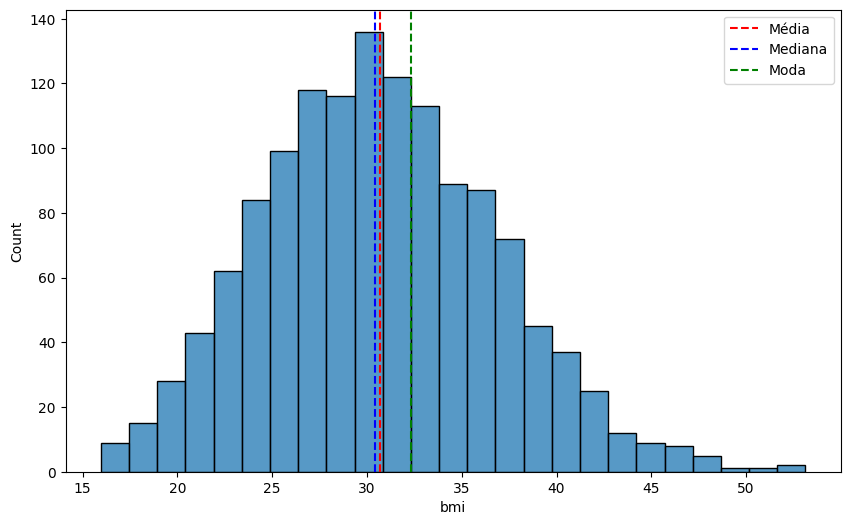

In [81]:
# Código aquii

plt.figure(figsize=(10,6))
sns.histplot(medical_dt, x = 'bmi')
plt.axvline(medical_dt['bmi'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(medical_dt['bmi'].median(), color='blue', linestyle='--', label='Mediana')
plt.axvline(medical_dt['bmi'].mode()[0], color='green', linestyle='--', label='Moda')
plt.legend()
plt.show()

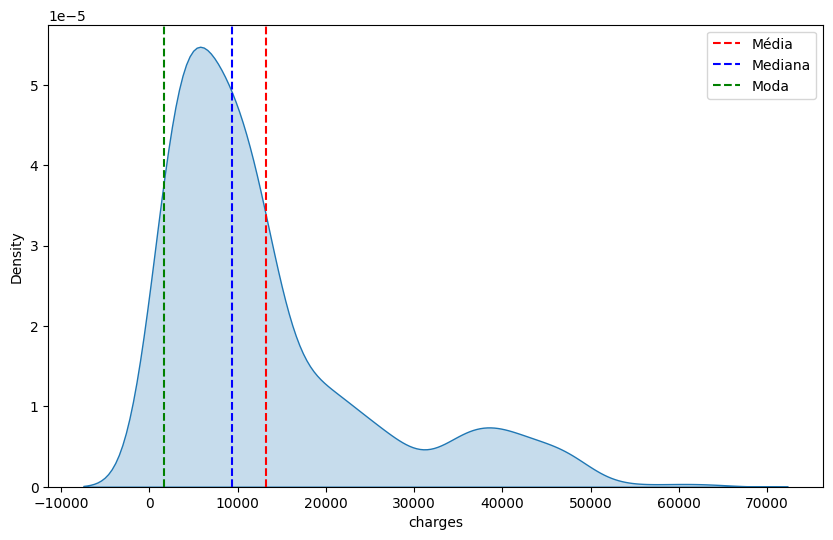

In [84]:
plt.figure(figsize=(10,6))
sns.kdeplot(medical_dt, x = 'charges', fill = True)
plt.axvline(medical_dt['charges'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(medical_dt['charges'].median(), color='blue', linestyle='--', label='Mediana')
plt.axvline(medical_dt['charges'].mode()[0], color='green', linestyle='--', label='Moda')
plt.legend()
plt.show()

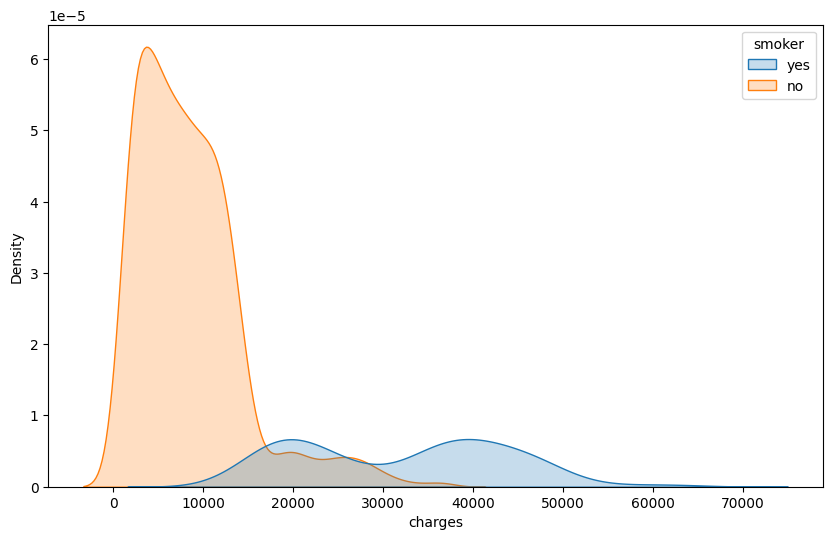

In [86]:
plt.figure(figsize=(10,6))
sns.kdeplot(medical_dt, x = 'charges', fill = True, hue = "smoker")
plt.show()

In [ ]:
# plt.axvline(medical_dt['bmi'].mean(), color='red', linestyle='--', label='Média')

### Scatter Plots (Gráficos de Dispersão)

Para criar um simples Scatter Plot com Seaborn, basta chamar:

```python
sns.scatterplot(x = data["coluna1"], y = data["coluna2"])
sns.scatterplot(data, x = "coluna1", y = "coluna2")
```


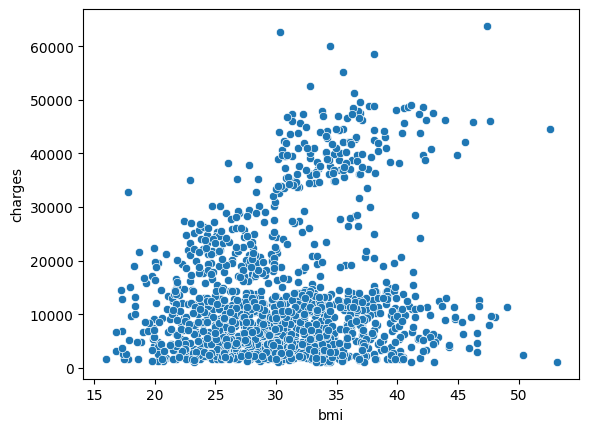

In [28]:
sns.scatterplot(medical_dt, x="bmi", y="charges")
plt.show()

**Outras formas de gráficos de dispersão com seaborn:**

- Plotando dados com linha de regressão:

```python
sns.regplot(x = data["coluna1"], y = data["coluna2"]) # regressão sobre todos os dados
sns.lmplot(data, x = "coluna1", y = "coluna 2", hue = "categorias") # regressoes com base nas categorias
```

- Plotando dados de forma categórica
 
```python
sns.swarmplot(x = data["coluna1"], y = data["coluna2"])
```

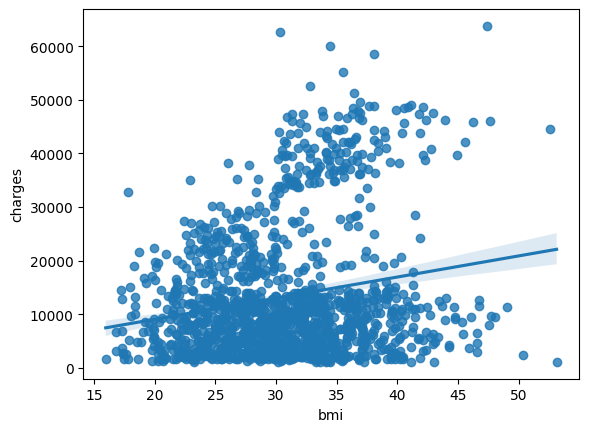

In [87]:
sns.regplot(medical_dt, x="bmi", y="charges")
plt.show()

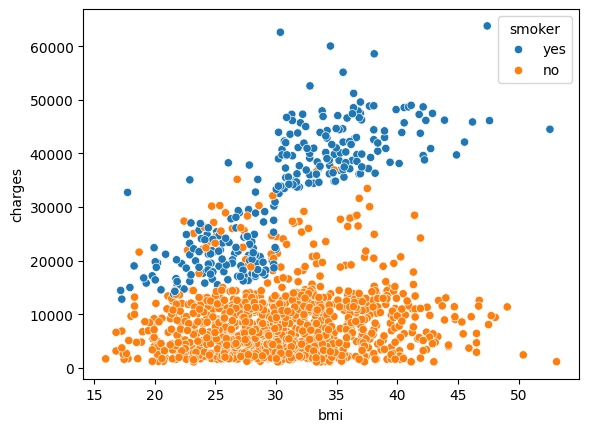

In [88]:
sns.scatterplot(medical_dt, x="bmi", y="charges", hue = "smoker")
plt.show()

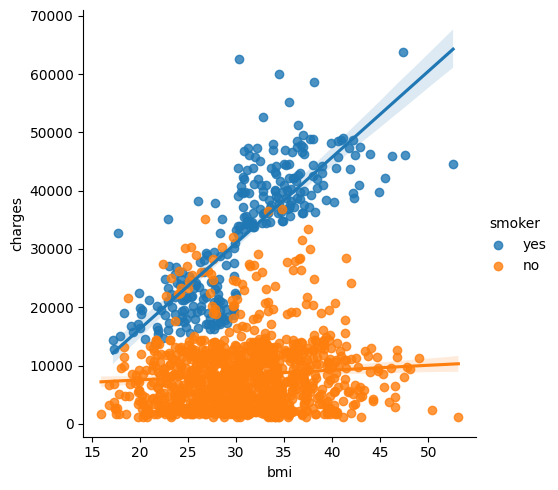

In [89]:
sns.lmplot(medical_dt, x="bmi", y="charges", hue = "smoker")
plt.show()

/home/thomruby/Documentos/LED/NES/prog_estruturada/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/home/thomruby/Documentos/LED/NES/prog_estruturada/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


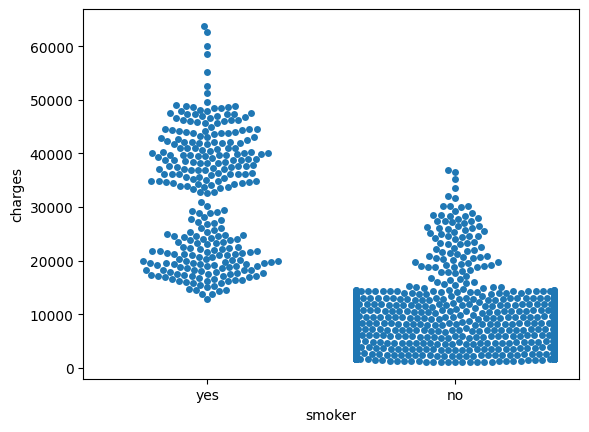

In [30]:
sns.swarmplot(medical_dt, x = "smoker", y = "charges")